In [1]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=50, true_m=2.5, true_b=5.0, noise_std=4.0):
    np.random.seed(42)
    X = np.linspace(0, 10, n)
    noise = np.random.normal(0, noise_std, X.shape)
    y = true_m * X + true_b + noise
    return X, y

In [2]:
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_params(m_norm, b_norm, X_orig):
    std = np.std(X_orig)
    mean = np.mean(X_orig)
    m_real = m_norm / std
    b_real = b_norm - m_norm * mean / std
    return m_real, b_real

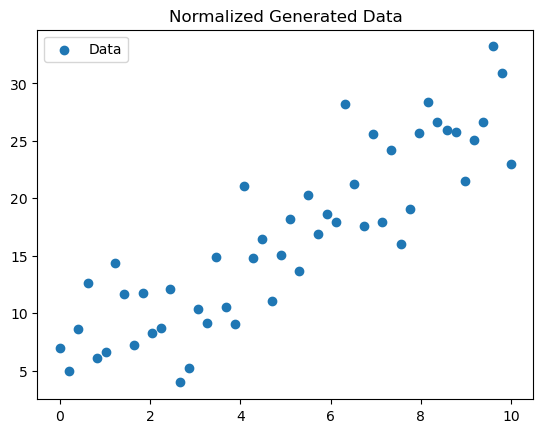

In [3]:
X_raw, y = generate_data()
plt.scatter(X_raw, y, label='Data')
plt.title("Normalized Generated Data")
plt.legend()
plt.show()

In [4]:
X = normalize(X_raw)

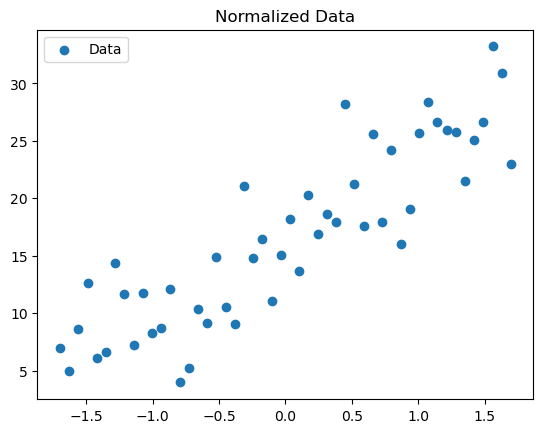

In [5]:
plt.scatter(X, y, label='Data')
plt.title("Normalized Data")
plt.legend()
plt.show()

In [6]:
# Loss Function
def predict(X, m, b):
    return m * X + b

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [7]:
def gradient_descent(X, y, lr=0.01, epochs=300):
    m, b = 0.0, 0.0
    m_vals, b_vals, y_preds, losses = [], [], [], []

    for epoch in range(epochs):
        y_pred = m * X + b
        error = y_pred - y

        grad_m = (2 / len(X)) * np.dot(error, X)
        grad_b = (2 / len(X)) * np.sum(error)

        m -= lr * grad_m
        b -= lr * grad_b

        loss = np.mean(error**2)

        m_vals.append(m)
        b_vals.append(b)
        y_preds.append(y_pred.copy())
        losses.append(loss)

        # Optional: print progress every 50 epochs
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}: m = {m:.4f}, b = {b:.4f}, loss = {loss:.4f}")

    return m_vals, b_vals, y_preds, losses

In [8]:
# Run training
m_vals, b_vals, y_preds, losses = gradient_descent(X, y, lr=0.01, epochs=300)

# Denormalize final parameters
m_final, b_final = denormalize_params(m_vals[-1], b_vals[-1], X_raw)

Epoch 50: m = 4.2471, b = 10.5536, loss = 57.4062
Epoch 100: m = 5.7938, b = 14.3969, loss = 19.0646
Epoch 150: m = 6.3570, b = 15.7965, loss = 13.9797
Epoch 200: m = 6.5621, b = 16.3062, loss = 13.3054
Epoch 250: m = 6.6368, b = 16.4918, loss = 13.2159
Epoch 300: m = 6.6640, b = 16.5594, loss = 13.2041


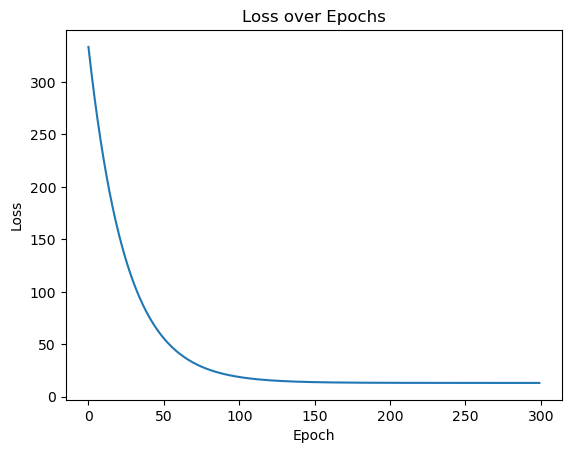

In [9]:
# Plot loss curve
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

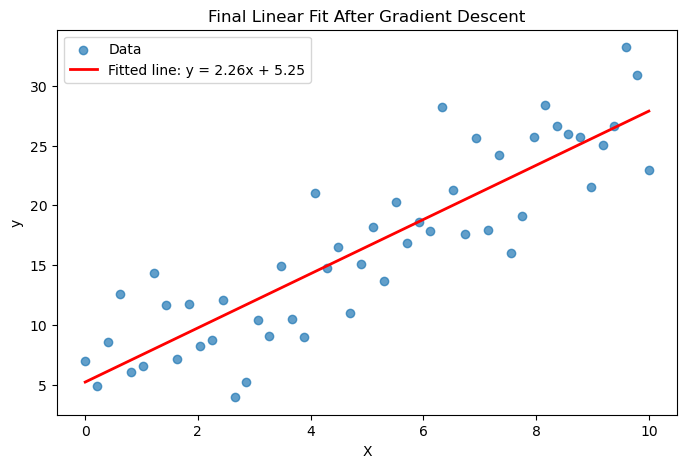

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(X_raw, y, label="Data", alpha=0.7)
plt.plot(X_raw, m_final * X_raw + b_final, color='red', linewidth=2, label=f"Fitted line: y = {m_final:.2f}x + {b_final:.2f}")
plt.title("Final Linear Fit After Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [11]:
print(f"Final Parameters: m = {m_final:.2f}, b = {b_final:.2f}")

Final Parameters: m = 2.26, b = 5.25


In [12]:
def create_gifs(X_orig, y, m_vals, b_vals, losses,
                fit_gif_path="line_fit.gif",
                loss_gif_path="loss_curve.gif",
                step=2, duration=0.2):
    os.makedirs("frames", exist_ok=True)
    fit_frames = []
    loss_frames = []

    # Precompute denormalized predictions for each step
    std = np.std(X_orig)
    mean = np.mean(X_orig)
    for i in range(0, len(m_vals), step):
        m_real = m_vals[i] / std
        b_real = b_vals[i] - m_vals[i] * mean / std
        y_pred_real = m_real * X_orig + b_real

        # Plot Line Fit
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.scatter(X_orig, y, label="Data", alpha=0.7)
        ax.plot(X_orig, y_pred_real, color='crimson', label=f"y = {m_real:.2f}x + {b_real:.2f}")
        ax.set_title(f"Epoch {i}")
        ax.set_xlim(min(X_orig) - 1, max(X_orig) + 1)
        ax.set_ylim(min(y) - 10, max(y) + 10)
        ax.legend()
        fname_fit = f"frames/fit_{i:03d}.png"
        fig.savefig(fname_fit)
        plt.close(fig)
        fit_frames.append(fname_fit)

        # Plot Loss Curve
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(losses[:i+1], label="Loss")
        ax.scatter(i, losses[i], color='red')
        ax.set_title("Loss Over Epochs")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("MSE Loss")
        ax.legend()
        fname_loss = f"frames/loss_{i:03d}.png"
        fig.savefig(fname_loss)
        plt.close(fig)
        loss_frames.append(fname_loss)

    # Create GIF for line fitting
    with imageio.get_writer(fit_gif_path, mode='I', duration=duration) as writer:
        for filename in fit_frames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Create GIF for loss curve
    with imageio.get_writer(loss_gif_path, mode='I', duration=duration) as writer:
        for filename in loss_frames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Clean up
    for f in fit_frames + loss_frames:
        os.remove(f)
    os.rmdir("frames")

    print(f"GIFs saved as '{fit_gif_path}' and '{loss_gif_path}'")

In [13]:
create_gifs(X_raw, y, m_vals, b_vals, losses,
            fit_gif_path="line_fit_learnable.gif",
            loss_gif_path="loss_curve_learnable.gif")

/tmp/ipykernel_132122/3769395197.py:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_132122/3769395197.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIFs saved as 'line_fit_learnable.gif' and 'loss_curve_learnable.gif'
